In [1]:
import MySQLdb as mdb
import pandas as pd

In [ ]:
# Construct your query of choice
query = ("""
         SELECT eventID, name, value, label
         FROM my_database.my_table
         """)

try:
    # Connect to server
    db = Mdb.connect(read_default_file='../../.my.cnf',
                     read_default_group='guest',
                     host='mysql.server.host.name',
                     db='my_schema_name')
    
    # Read out result of query into a DataFrame
    data_df = pd.read_sql(query, db)
    data_df.index.name="id"
    
    # Close the connection
    db.close()
    
# Catch database exceptions
except Mdb.Error, e:
    print "Error %d: %s" % (e.args[0], e.args[1])    

In [63]:
# Write data to csv for offline usage
data_df.to_csv('violin-plot-data.csv', index_label='id')

In [4]:
# Load offline data into DataFrame
data_df = pd.read_csv('violin-plot-data.csv', index_col='id')

In [5]:
# Here we have all the data in *Long* format
data_df.head()

,eventID,key,value,label
id,,,,
0,441627,AfterInhMATRIX5,50999,1
1,441628,AfterInhMATRIX5,52941,1
2,441629,AfterInhMATRIX5,49258,1
3,441630,AfterInhMATRIX5,51881,1
4,441631,AfterInhMATRIX5,48586,1


In [6]:
# Use the pivot function to get it into *wide* format
wide_df = data_df.pivot(index='eventID',
                        columns='key',
                        values='value')
wide_df.head()

key,AfterInhMATRIX5,PrescaleMATRIX5,RawMATRIX4,RawTriggers
eventID,,,,
430001,27094,12,1598521,10759045
430002,34901,14,1670878,11813291
430003,36317,15,1675869,12002554
430004,34088,14,1637602,11564482
430005,27489,12,1587623,10627391


In [7]:
# This pivoted DataFrame doesn't have the *class* field
# Use the SQL-esque *merge* function to add it to each entry
wide_df = (wide_df.merge(data_df[['eventID', 'label']],
                         left_index=True,
                         right_on='eventID')
                  .set_index('eventID'))
#wide_df['class'] = wide_df['class'].astype(int)
wide_df.head()

key,AfterInhMATRIX5,PrescaleMATRIX5,RawMATRIX4,RawTriggers,label
eventID,,,,,
430001,27094,12,1598521,10759045,2
430001,27094,12,1598521,10759045,2
430001,27094,12,1598521,10759045,2
430001,27094,12,1598521,10759045,2
430002,34901,14,1670878,11813291,3


In [8]:
import matplotlib.pylab as plt
import seaborn as sns

# Show plots in notebook
%matplotlib inline

# Set some styling options
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=1.4)

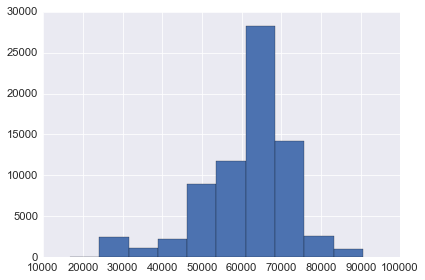

In [9]:
# Using Pandas
wide_df.query("label == 1").AfterInhMATRIX5.hist()

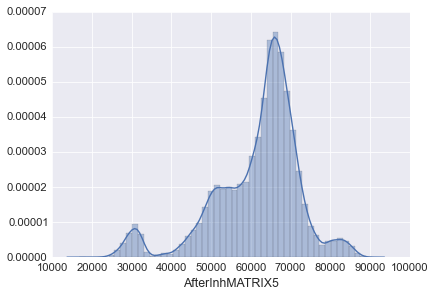

In [10]:
# Using Seaborn's 'distplot' shows histogram and a kde plot
sns.distplot(wide_df.query("label == 1").AfterInhMATRIX5)

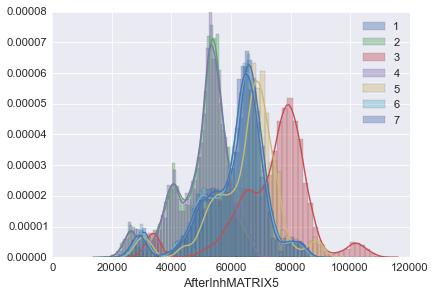

In [11]:
feature = "AfterInhMATRIX5"
for label in range(1,8):
    sns.distplot(
        wide_df.query("label == @label")[feature],
        label=str(label))
plt.legend(loc='best')

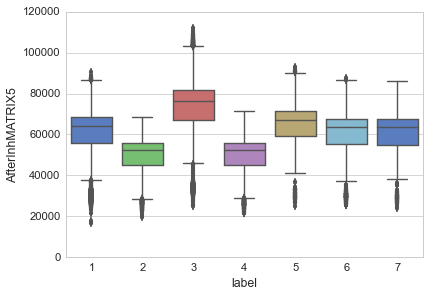

In [12]:
sns.set_style("whitegrid", )
sns.boxplot(x='label', y=feature,
            data=wide_df.sort_values('label'),
            palette='muted')

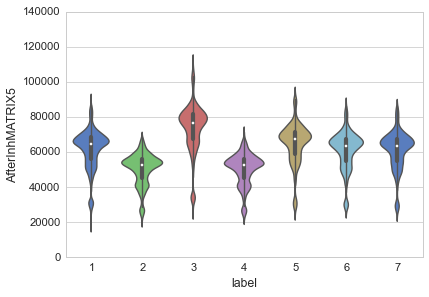

In [13]:
sns.violinplot(x='label', y=feature,
               data=wide_df.sort_values('label'),
               palette='muted')